In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
# サンプルデータ作成 NumPyのarray
arr = np.array([[1,3,np.nan],[np.nan,5,7]])
# サンプルデータ作成 DataFrame 上の行のarrをデータに指定
dframe1 = DataFrame(arr,index=['行1','行2'],columns = ['列1','列2','列3'])
dframe1

,列1,列2,列3
行1,1.0,3.0,NaN
行2,NaN,5.0,7.0


In [3]:
# DataFrameの加算
#行方向への処理 列ごとの合計
dframe1.sum()

列1    1.0
列2    8.0
列3    7.0
dtype: float64

In [4]:
# DataFrameの加算
# 行合計は列方向（axis=1）での処理
dframe1.sum(axis=1)

行1     4.0
行2    12.0
dtype: float64

In [5]:
# DataFrameの最小値
# 列ごと
dframe1.min()

列1    1.0
列2    3.0
列3    7.0
dtype: float64

In [6]:
# DataFrameの最小値
# 行ごと
dframe1.min(axis=1)

行1    1.0
行2    5.0
dtype: float64

In [7]:
# 最小値データのあるindexを返す
# 列ごと
dframe1.idxmin()

列1    行1
列2    行1
列3    行2
dtype: object

In [8]:
# 最小値データのあるindexを返す
# 行ごと
dframe1.idxmin(axis=1)

行1    列1
行2    列2
dtype: object

In [9]:
# maxも同様の操作可能
dframe1.max()
dframe1.idxmax()

列1    行1
列2    行2
列3    行2
dtype: object

In [10]:
#元データ確認
dframe1

,列1,列2,列3
行1,1.0,3.0,NaN
行2,NaN,5.0,7.0


In [11]:
# 累積計算　列ごと Accumulation
dframe1.cumsum()

,列1,列2,列3
行1,1.0,3.0,NaN
行2,NaN,8.0,7.0


In [12]:
# 累積計算 行ごと Accumulation
dframe1.cumsum(axis=1)

,列1,列2,列3
行1,1.0,4.0,NaN
行2,NaN,5.0,12.0


In [13]:
# DataFrameの統計情報確認
dframe1.describe()

,列1,列2,列3
count,1.0,2.000000,1.0
mean,1.0,4.000000,7.0
std,NaN,1.414214,NaN
min,1.0,3.000000,7.0
25%,1.0,3.500000,7.0
50%,1.0,4.000000,7.0
75%,1.0,4.500000,7.0
max,1.0,5.000000,7.0


In [14]:
# サンプルデータセットをWebから入手
# pandas_datareaderは標準でannacondaに入っていないため pip install pandas_datareader でインストール
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015,1,5)
end = datetime(2018,12,31)

# サンプルデータはiex 株式取引所から取得
f = web.DataReader('F', 'iex', start, end)

In [15]:
# 日付指定によるデータ表示
f.loc['2018-12-31']

open      7.593800e+00
high      7.603400e+00
low       7.255200e+00
close     7.400300e+00
volume    5.781604e+07
Name: 2018-12-31, dtype: float64

In [16]:
# データの先頭部分だけ表示
f.head()

,open,high,low,close,volume
date,,,,,
2015-01-05,11.6131,11.6208,11.2828,11.3366,44079745
2015-01-06,11.4288,11.4441,11.0447,11.2291,32981627
2015-01-07,11.3520,11.5901,11.3443,11.5517,26065329
2015-01-08,11.8282,11.8896,11.6976,11.8435,33943398
2015-01-09,11.8742,11.8819,11.5670,11.6822,23420750


In [17]:
# 変化の割合計算 pct_change 2015-01-05と2015-01-06のopen列の場合　(11.4288/11.6131) - 1  ※ (当日/前日) - 1
rets = f.pct_change()
rets

,open,high,low,close,volume
date,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,-0.015870,-0.015205,-0.021103,-0.009483,-0.251774
2015-01-07,-0.006720,0.012758,0.027126,0.028729,-0.209702
2015-01-08,0.041949,0.025841,0.031143,0.025260,0.302243
2015-01-09,0.003889,-0.000648,-0.011165,-0.013619,-0.310006
2015-01-12,-0.009702,-0.009695,0.003320,0.000659,-0.028606
2015-01-13,0.004575,0.010445,-0.001982,-0.000659,0.155098
2015-01-14,-0.020156,-0.020674,-0.016577,-0.006574,0.400272
2015-01-15,0.003318,0.000000,-0.002028,-0.016544,-0.321127


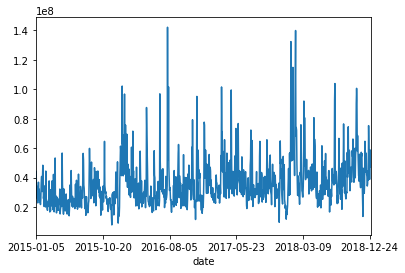

In [18]:
# データの変化を可視化
import matplotlib
%matplotlib inline
g = f.volume
g.plot()

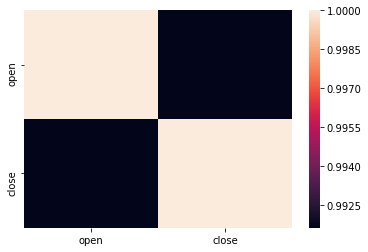

In [19]:
import seaborn as sns
# 相関
h=f.loc[:,['open','close']]
sns.heatmap(h.corr())
# seabornは後日 可視化ライブラリ

In [20]:
# 重複を省いてユニークデータ抽出
h['open'].unique()

array([11.6131, 11.4288, 11.352 , 11.8282, 11.8742, 11.759 , 11.8128,
       11.5747, 11.375 , 11.5824, 11.5056, 11.5286, 11.5363, 11.4902,
       11.5066, 11.3437, 11.4445, 12.0032, 12.1661, 12.4222, 12.2903,
       12.2282, 12.4532, 12.4765, 12.6782, 12.6704, 12.5773, 12.5385,
       12.5618, 12.717 , 12.6937, 12.7248, 12.7092, 12.7325, 12.4687,
       12.4842, 12.4454, 12.3989, 12.3678, 12.2359, 12.3213, 12.6161,
       12.6549, 12.7403, 12.686 , 12.7791, 12.8644, 12.8256, 12.4997,
       12.4609, 12.5075, 12.3601, 12.3756, 12.3911, 12.4144, 12.3368,
       12.329 , 12.3523, 12.2825, 12.2049, 12.2747, 12.4218, 12.5079,
       12.4531, 12.3826, 12.3513, 12.226 , 12.1085, 12.2338, 12.2573,
       12.2103, 12.1712, 12.1398, 11.9597, 12.1163, 11.9675, 11.9284,
       11.991 , 12.0067, 12.0928, 11.9754, 11.85  , 11.7639, 11.6151,
       11.6856, 11.7561, 11.8344, 11.9049, 11.7952, 11.7717, 11.8187,
       11.8579, 12.1555, 12.085 , 11.8814, 11.5524, 11.5681, 11.4898,
       11.4349, 11.3

In [21]:
# 同じ値になるデータのカウント
h['open'].value_counts()

10.4020    5
10.1483    4
10.2327    4
11.7561    4
10.4269    4
10.8132    4
9.8481     4
11.0017    4
10.9956    3
12.1398    3
10.9695    3
11.9284    3
11.6214    3
9.0738     3
9.7884     3
10.9307    3
9.0641     3
10.8567    3
9.8235     3
10.9668    3
10.3847    3
10.9735    3
10.8404    3
10.8654    3
9.8147     3
9.0562     3
12.5385    3
10.8314    3
10.6464    3
8.9137     3
          ..
9.4234     1
10.9568    1
10.2307    1
10.5366    1
11.3065    1
9.4078     1
10.1879    1
12.3826    1
8.9992     1
11.2353    1
11.8243    1
9.2286     1
9.8323     1
10.5519    1
12.6161    1
12.2825    1
10.8208    1
10.8381    1
9.7834     1
9.4690     1
10.2706    1
11.2919    1
8.3055     1
11.8344    1
9.9467     1
9.9406     1
10.7959    1
12.0928    1
11.5363    1
11.3750    1
Name: open, Length: 789, dtype: int64